In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Create density plot 
def kde_plot(df, attribute, title, x_label, file_name):
    sns.kdeplot(data=df, x=attribute)
    plt.title(title)
    plt.xlabel(x_label)
    plt.savefig(plt.savefig("../plots/" + file_name + ".png"), transparent=True, facecolor="white", bbox_inches="tight")
    plt.show()
    plt.close()
    
# Create scatter plot for attribute vs rental cost
def scatter_plot(df, attribute, x_label, y_label, title, file_name):
    plt.figure(figsize=(15,7))
    sns.scatterplot(data=df, x=attribute, y="cost_text")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(plt.savefig("../plots/" + file_name + ".png"), transparent=True, facecolor="white", bbox_inches="tight")
    plt.show()
    plt.close()

In [3]:
rental_df = pd.read_csv("../data/curated/Final_Preprocessed_Scraped_Rental.csv")

# Density Plots

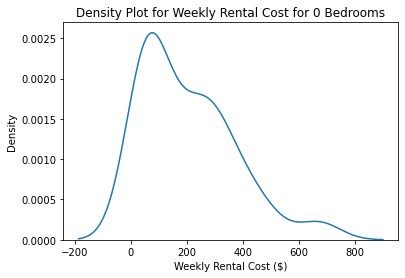

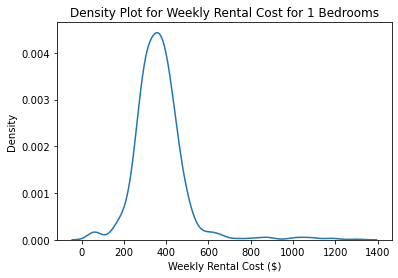

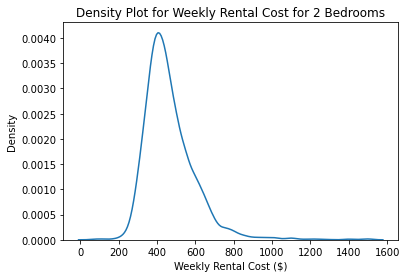

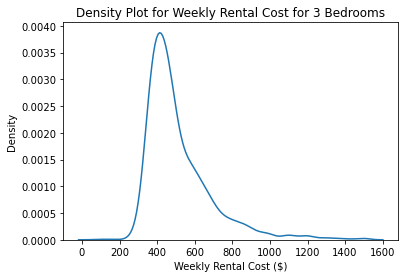

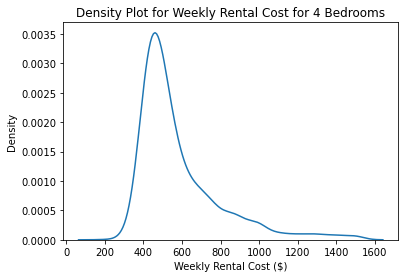

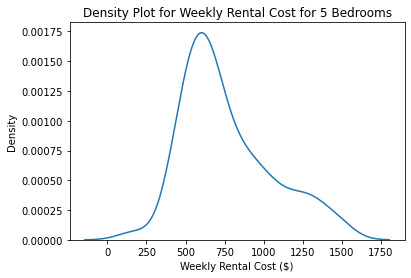

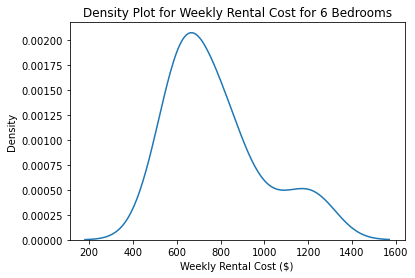

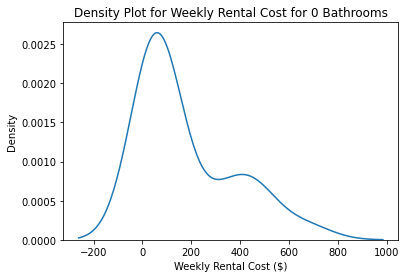

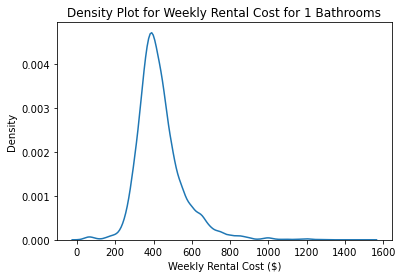

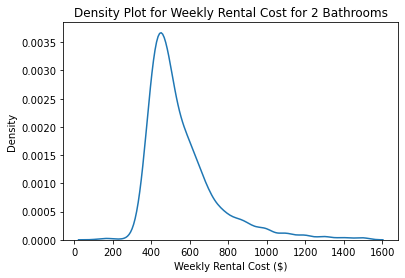

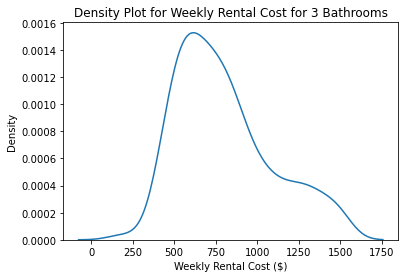

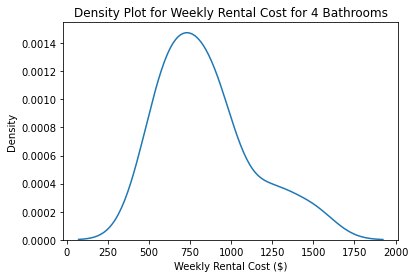

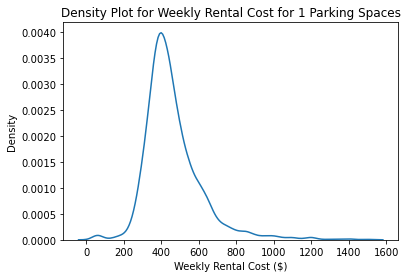

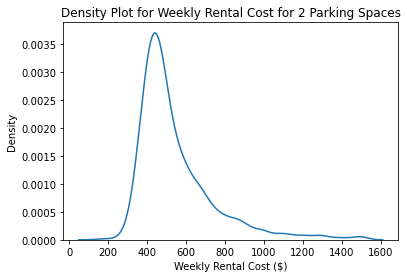

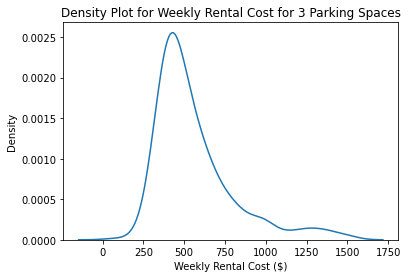

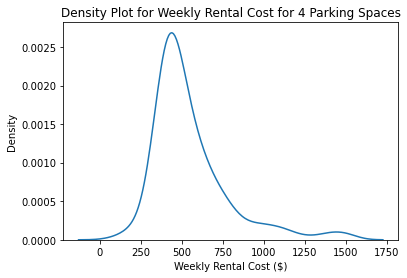

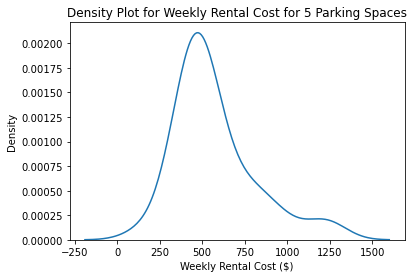

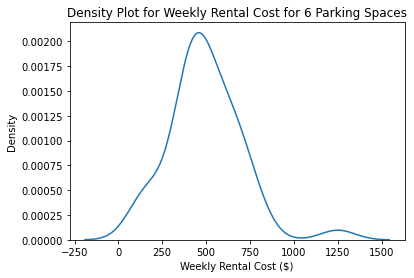

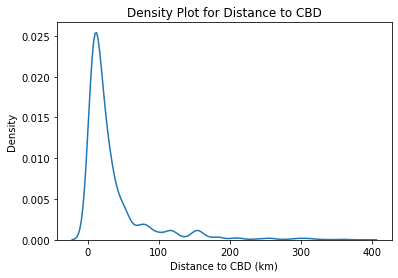

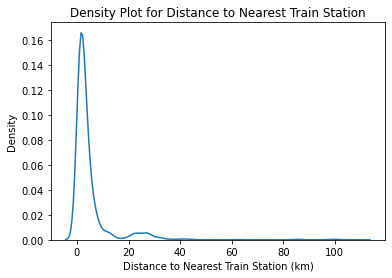

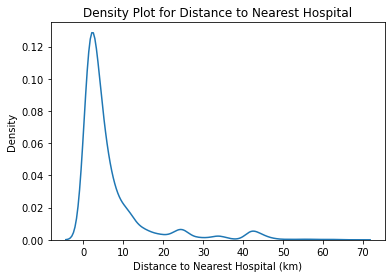

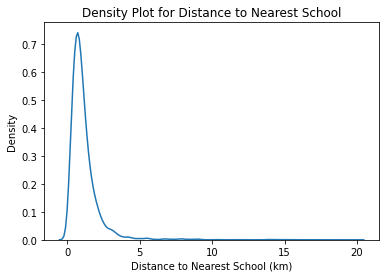

In [4]:
# Obtain recorded number of bedrooms, bathrooms and parking spaces (all unique values)
bedrooms_list = sorted(rental_df["bedrooms"].unique())
bathrooms_list = sorted(rental_df["bathrooms"].unique())
parking_spaces_list = rental_df["parking_spaces"].unique()
parking_spaces_list = sorted([int(i) for i in parking_spaces_list])

# Create density plots for the cost text of each unique number of bedrooms
for i in bedrooms_list:
    bedroom_df = rental_df[rental_df["bedrooms"]==i]
    kde_plot(bedroom_df, "cost_text", "Density Plot for Weekly Rental Cost for {bedroom} Bedrooms".format(bedroom = i), 
             "Weekly Rental Cost ($)", "density_plot_{bedroom}bedrooms".format(bedroom = i))
    
# Create density plots for the cost text of each unique number of bathrooms
for i in bathrooms_list:
    bathroom_df = rental_df[rental_df["bathrooms"]==i]
    kde_plot(bathroom_df, "cost_text", "Density Plot for Weekly Rental Cost for {bathroom} Bathrooms".format(bathroom = i), 
             "Weekly Rental Cost ($)", "density_plot_{bathroom}bathrooms".format(bathroom = i))

# Create density plots for the cost text of each unique number of parking spaces
for i in parking_spaces_list:
    parking_spaces_df = rental_df[rental_df["parking_spaces"]==i]
    kde_plot(parking_spaces_df, "cost_text", "Density Plot for Weekly Rental Cost for {parking_space} Parking Spaces".format(parking_space = i), 
             "Weekly Rental Cost ($)", "density_plot_{parking_space}parking_spaces".format(parking_space = i))

# Create density plot for distance to CBD
kde_plot(rental_df, "distance_to_cbd", "Density Plot for Distance to CBD", "Distance to CBD (km)", "density_plot_distance_to_CBD")

# Create density plot for distance to nearest train station
kde_plot(rental_df, "nearest_train_station", "Density Plot for Distance to Nearest Train Station", "Distance to Nearest Train Station (km)", "density_plot_distance_to_nearest_train_station")

# Create density plot for distance to nearest hospital
kde_plot(rental_df, "nearest_hospital", "Density Plot for Distance to Nearest Hospital", "Distance to Nearest Hospital (km)", "density_plot_distance_to_nearest_hospital")

# Create density plot for distance to nearest school
kde_plot(rental_df, "nearest_school", "Density Plot for Distance to Nearest School", "Distance to Nearest School (km)", "density_plot_distance_to_nearest_school")

# Correlation Heatmap 

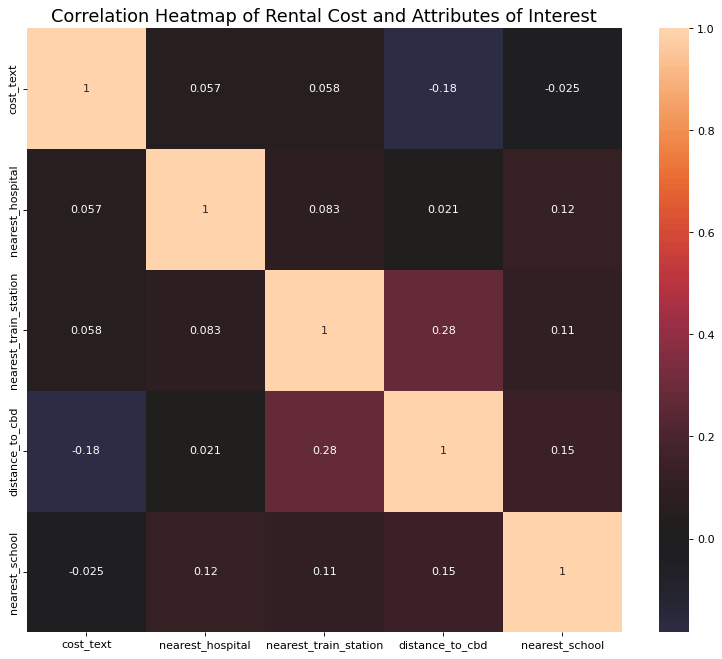

In [5]:
# Drop non-continuous attributes
heatmap_df = rental_df.drop(["Unnamed: 0", "coordinates", "postcode", "suburb", "bedrooms", "bathrooms", "parking_spaces", 
                             "house_postcode"], axis=1)

# Plot correlation heatmap of continuous attributes 
plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(heatmap_df.corr(), xticklabels=heatmap_df.corr().columns, yticklabels=heatmap_df.corr().columns, center=0, annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap of Rental Cost and Attributes of Interest", fontsize=16)
plt.savefig(plt.savefig("../plots/correlation_heatmap.png"), facecolor="white", bbox_inches="tight")
plt.show()
plt.close()

# Bar Plot

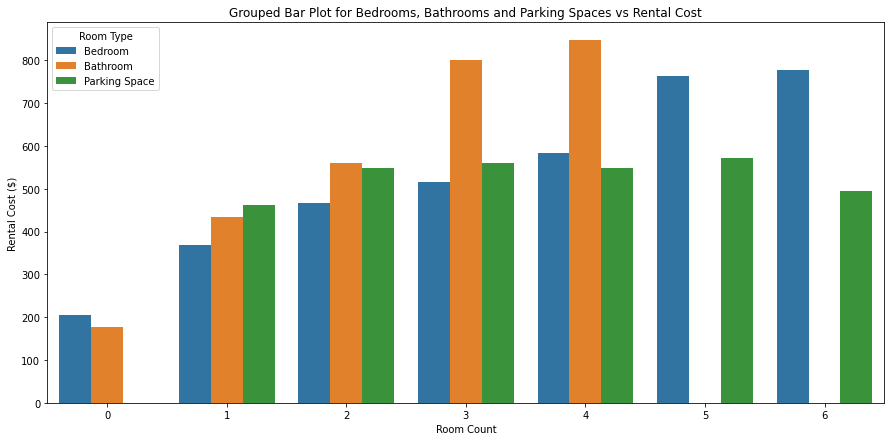

In [6]:
# Create grouped bar plot of number of bedrooms, bathrooms and parking spaces vs rental cost
grouped_bedrooms_df = rental_df[["bedrooms", "cost_text"]].groupby("bedrooms").agg({"cost_text": "mean"}).rename({"cost_text": "Bedroom"}, axis=1)
grouped_bathrooms_df = rental_df[["bathrooms", "cost_text"]].groupby("bathrooms").agg({"cost_text": "mean"}).rename({"cost_text": "Bathroom"}, axis=1)
grouped_parking_spaces_df = rental_df[["parking_spaces", "cost_text"]].groupby("parking_spaces").agg({"cost_text": "mean"}).rename({"cost_text": "Parking Space"}, axis=1)
grouped_rooms_df = pd.concat([grouped_bedrooms_df, grouped_bathrooms_df, grouped_parking_spaces_df], axis=1).melt()
grouped_rooms_df["room_count"] = [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(15,7))
grouped_barplot = sns.barplot(data=grouped_rooms_df, x="room_count", y="value", hue="variable")
grouped_barplot.legend(title="Room Type")
plt.xlabel("Room Count")
plt.ylabel("Rental Cost ($)")
plt.title("Grouped Bar Plot for Bedrooms, Bathrooms and Parking Spaces vs Rental Cost")
plt.savefig("../plots/grouped_bar_plot_rooms_rental_cost.png", facecolor="white", bbox_inches="tight")
plt.show()
plt.close()

# Scatter Plots

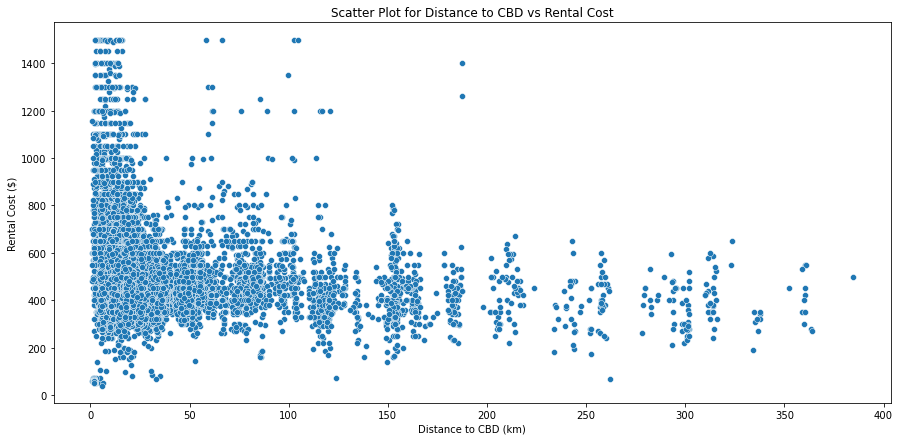

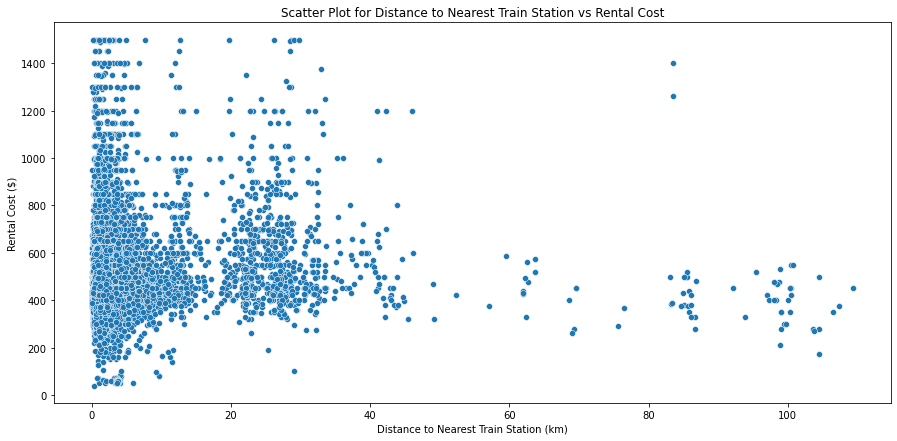

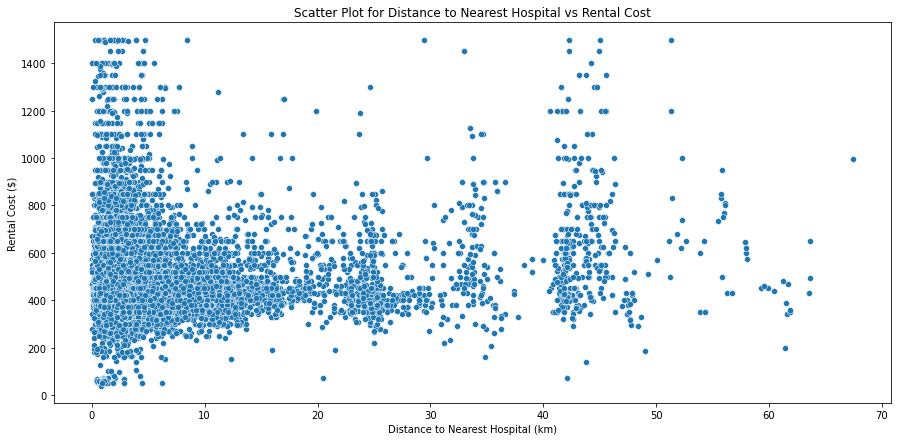

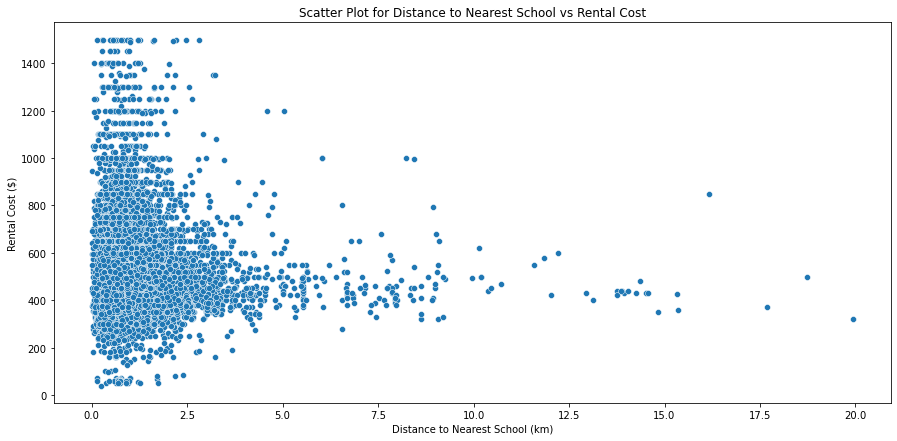

In [7]:
# Create scatter plot of distance to CBD vs rental cost
scatter_plot(rental_df, "distance_to_cbd", "Distance to CBD (km)", "Rental Cost ($)", "Scatter Plot for Distance to CBD vs Rental Cost", "scatter_plot_distance_to_cbd_rental_cost")

# Create scatter plot of distance to nearest train station vs rental cost
scatter_plot(rental_df, "nearest_train_station", "Distance to Nearest Train Station (km)", "Rental Cost ($)", "Scatter Plot for Distance to Nearest Train Station vs Rental Cost", "scatter_plot_distance_to_nearest_train_station_rental_cost")

# Create scatter plot of distance to nearest hospital vs rental cost
scatter_plot(rental_df, "nearest_hospital", "Distance to Nearest Hospital (km)", "Rental Cost ($)", "Scatter Plot for Distance to Nearest Hospital vs Rental Cost", "scatter_plot_distance_to_nearest_hospital_rental_cost")

# Create scatter plot of distance to nearest school vs rental cost
scatter_plot(rental_df, "nearest_school", "Distance to Nearest School (km)", "Rental Cost ($)", "Scatter Plot for Distance to Nearest School vs Rental Cost", "scatter_plot_distance_to_nearest_school_rental_cost")

# ANOVA

In [8]:
# Bin the continuous attributes
distance_to_cbd_bins = [0, 1, 5, 10, 25, 50, 100, 200, 300, 400]
rental_df["distance_to_cbd_binned"] = np.searchsorted(distance_to_cbd_bins, rental_df["distance_to_cbd"].values)
rental_df["distance_to_cbd_binned"] = rental_df.groupby(pd.cut(rental_df["distance_to_cbd_binned"], bins=distance_to_cbd_bins)).size()

distance_to_nearest_train_station_bins = [0, 1, 5, 10, 15, 20, 25, 30, 40, 120]
rental_df["distance_to_nearest_train_station_binned"] = np.searchsorted(distance_to_nearest_train_station_bins, rental_df["nearest_train_station"].values)
rental_df["distance_to_nearest_train_station_binned"] = rental_df.groupby(pd.cut(rental_df["distance_to_nearest_train_station_binned"], bins=distance_to_nearest_train_station_bins)).size()

distance_to_nearest_hospital_bins = [0, 1, 5, 10, 15, 20, 30, 40, 50, 70]
rental_df["distance_to_nearest_hospital_binned"] = np.searchsorted(distance_to_nearest_hospital_bins, rental_df["nearest_hospital"].values)
rental_df["distance_to_nearest_hospital_binned"] = rental_df.groupby(pd.cut(rental_df["distance_to_nearest_hospital_binned"], bins=distance_to_nearest_hospital_bins)).size()

distance_to_nearest_school_bins = [0, 1, 2, 3, 4, 5, 7.5, 10, 15, 20]
rental_df["distance_to_nearest_school_binned"] = np.searchsorted(distance_to_nearest_school_bins, rental_df["nearest_school"].values)
rental_df["distance_to_nearest_school_binned"] = rental_df.groupby(pd.cut(rental_df["distance_to_nearest_school_binned"], bins=distance_to_nearest_school_bins)).size()

# Fit linear model and perform ANOVA
rental_model = ols("cost_text ~ C(bedrooms) + C(bathrooms) + C(parking_spaces) + C(distance_to_cbd_binned) + \
                   C(distance_to_nearest_train_station_binned) + C(distance_to_nearest_hospital_binned) + \
                   C(distance_to_nearest_school_binned)", data=rental_df)
rental_anova = sm.stats.anova_lm(rental_model.fit(), typ=2)
rental_anova

C:\Users\benja\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\Users\benja\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\benja\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(bedrooms),2.593854e+06,6.0,361.332843,3.484934e-08
C(bathrooms),3.571778e+06,4.0,746.341753,6.947755e-09
C(parking_spaces),4.867788e+04,5.0,8.137199,1.491999e-02
C(distance_to_cbd_binned),2.975758e+03,3.0,0.829067,5.186771e-01
C(distance_to_nearest_train_station_binned),2.975758e+03,3.0,0.829067,5.186771e-01
C(distance_to_nearest_hospital_binned),2.975758e+03,3.0,0.829067,5.186771e-01
C(distance_to_nearest_school_binned),3.103563e+04,7.0,3.705747,5.265359e-02
Residual,8.375000e+03,7.0,NaN,NaN
